In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# import file from local

In [3]:
from google.colab import files
uploaded = files.upload()

Saving uber_data.csv to uber_data.csv


In [48]:
df = pd.read_csv("uber_data.csv")

In [50]:
df.head(10)

#inconsistancy in date timestamp found

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [51]:
df.shape

(6745, 6)

In [52]:
df.info()

#change dtype of request and drop timestamp to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [53]:
df.columns = df.columns.str.lower().str.replace(" ","_")

#normalizing the naming conventions

In [54]:
df.head(10)

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [55]:
pd.to_datetime(df['request_timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

,request_timestamp
0,2016-07-11 11:51:00
1,2016-07-11 17:57:00
2,2016-07-12 09:17:00
3,2016-07-12 21:08:00
4,NaT
...,...
6740,NaT
6741,NaT
6742,NaT
6743,NaT


In [56]:
# Two date formats are found in the date columns
# Handling the two date formats by parsing it seperately
df['request_timestamp1'] = pd.to_datetime(df['request_timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['request_timestamp1'].isnull()
df.loc[mask, 'request_timestamp1'] = pd.to_datetime(df[mask]['request_timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

df['drop_timestamp1'] = pd.to_datetime(df['drop_timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['drop_timestamp1'].isnull()
df.loc[mask, 'drop_timestamp1'] = pd.to_datetime(df[mask]['drop_timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

In [57]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_timestamp1,drop_timestamp1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [58]:
#dropping the columns which had date inconsistancy
df.drop(columns=["request_timestamp", 'drop_timestamp'], inplace= True)

In [59]:
#column mapping
data = {"drop_timestamp1" : 'drop_timestamp','request_timestamp1': 'request_timestamp' }

df.rename(columns = data, inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


### Understanding the data spread

In [61]:
categorical = df.select_dtypes(include= 'object').columns

for i in categorical:
  print(df[i].value_counts(normalize = True)*100)

pickup_point
City       51.99407
Airport    48.00593
Name: proportion, dtype: float64
status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: proportion, dtype: float64


In [62]:
numerical= df.select_dtypes(include = ["int", "float", 'datetime']).columns

for i in numerical:
  print(df[i].value_counts(normalize = True)*100)

request_id
6753    0.014826
619     0.014826
867     0.014826
1807    0.014826
2532    0.014826
          ...   
3075    0.014826
2784    0.014826
1983    0.014826
1467    0.014826
267     0.014826
Name: proportion, Length: 6745, dtype: float64
driver_id
27.0     0.537241
22.0     0.512821
70.0     0.512821
84.0     0.512821
177.0    0.512821
           ...   
208.0    0.195360
123.0    0.170940
42.0     0.170940
265.0    0.146520
300.0    0.146520
Name: proportion, Length: 300, dtype: float64
request_timestamp
2016-07-11 08:37:00    0.088955
2016-07-11 19:02:00    0.088955
2016-07-11 09:40:00    0.088955
2016-07-11 17:57:00    0.088955
2016-07-11 09:24:00    0.074129
                         ...   
2016-07-15 22:13:11    0.014826
2016-07-14 00:38:22    0.014826
2016-07-14 08:31:12    0.014826
2016-07-15 12:44:52    0.014826
2016-07-12 10:29:00    0.014826
Name: proportion, Length: 5618, dtype: float64
drop_timestamp
2016-07-12 06:22:00    0.141293
2016-07-12 21:53:00    0.141293
2016-

In [63]:
null_data_driver = df[ (df['driver_id'].isna())]

In [64]:
null_data_droptime = df[ (df['drop_timestamp'].isna())]

# **Null Analysis**

###**Almost 59% of drop_timestamp and 40% driver id datas are missing**

###1. have to check the data to understand the issue.
###2. If no reasons are found then we have to check this with product owners or the data ops/engineering team to understand the reason and if this is expected

In [65]:
(df['drop_timestamp'].isna().sum()/df.shape[0])*100 ,  df['drop_timestamp'].isna().sum()

(np.float64(58.028169014084504), np.int64(3914))

In [66]:
(df['driver_id'].isna().sum()/df.shape[0])*100 , df['driver_id'].isna().sum()

(np.float64(39.288361749444036), np.int64(2650))

In [67]:
driver_null= null_data_driver.groupby("status").apply('size')
drop_null = null_data_droptime.groupby('status').apply('size')

driver_null, drop_null

# we are able to understand the reason for no details on 'driver id' and 'drop timestamp' since the status of the rides are either "cancelled" or "no cars available".
#Therefore, this might help us understand the reason for cancellation and no cars available

(status
 No Cars Available    2650
 dtype: int64,
 status
 Cancelled            1264
 No Cars Available    2650
 dtype: int64)

### Duplicate check

In [68]:
df.duplicated().sum()

#no row duplicates

np.int64(0)

In [69]:
df['request_id'].duplicated().sum()

#request id can be treated as primary key since it has no duplicates

np.int64(0)

In [70]:
df.set_index('request_id', drop = True, inplace = True)

In [71]:
df.sort_index().head()

,pickup_point,driver_id,status,request_timestamp,drop_timestamp
request_id,,,,,
1,Airport,285.0,Trip Completed,2016-07-11 00:20:00,2016-07-11 00:51:00
2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
3,Airport,80.0,Trip Completed,2016-07-11 00:24:00,2016-07-11 01:31:00
4,City,NaN,No Cars Available,2016-07-11 00:37:00,NaT
5,Airport,264.0,Trip Completed,2016-07-11 00:36:00,2016-07-11 01:35:00


# **Feature Engineering**

In [72]:
# Categorizing the drop hour and request hour columns

# Late Night: 12 AM to 4 AM
# Early Morning: 4 AM to 8 AM
# Late Morning: 8 AM to 12 PM
# Afternoon: 12 PM to 4 PM
# Evening: 4 PM to 8 PM
# Night: 8 PM to 12 AM

trip_time_label = ["late_night", "early_morning","late_morning", "afternoon","evening", "night"]
bins = [1,4,8,12,16,20,24]

In [73]:
#request timestamps
df["request_date"] = pd.to_datetime(df["request_timestamp"]).dt.date
df["request_year"] = pd.to_datetime(df["request_timestamp"]).dt.year
df["request_day"] = pd.to_datetime(df["request_timestamp"]).dt.day_name()
df["request_hour"] = pd.to_datetime(df["request_timestamp"]).dt.hour

In [74]:
df["request_date"] = pd.to_datetime(df["request_timestamp"]).dt.date
df["request_year"] = pd.to_datetime(df["request_timestamp"]).dt.year
df["request_day"] = pd.to_datetime(df["request_timestamp"]).dt.day_name()
df["request_hour"] = pd.to_datetime(df["request_timestamp"]).dt.hour

In [75]:
#drop timestamps

df["drop_date"] = pd.to_datetime(df["drop_timestamp"]).dt.date
df["drop_year"] = pd.to_datetime(df["drop_timestamp"]).dt.year
df["drop_day"] = pd.to_datetime(df["drop_timestamp"]).dt.day_name()
df["drop_hour"] = pd.to_datetime(df["drop_timestamp"]).dt.hour

In [76]:
#request and drop dayslot

df["request_dayslot"] = pd.cut(df["request_hour"], bins= bins, labels=trip_time_label)
df["drop_dayslot"] = pd.cut(df["drop_hour"], bins= bins, labels=trip_time_label)

In [77]:
np.round((df['drop_timestamp']- df['request_timestamp']).dt.total_seconds()/60,2)

,0
request_id,
619,69.00
867,50.00
1807,41.00
2532,55.00
3112,52.52
...,...
6745,NaN
6752,NaN
6751,NaN


In [78]:
df["trip_time_min"]= np.round((df['drop_timestamp']- df['request_timestamp']).dt.total_seconds()/60,2)
df["trip_time_hour"]= np.round((df['drop_timestamp']- df['request_timestamp']).dt.total_seconds()/3600,2)

In [79]:
print(
    f"Time taken to complete the ride - "
    f"min: {df['trip_time_min'].min():.2f}, "
    f"avg: {df['trip_time_min'].mean():.2f}, "
    f"max: {df['trip_time_min'].max():.2f}"
)


Time taken to complete the ride - min: 20.78, avg: 52.41, max: 83.00


In [80]:
df['trip_duration_slot'] = pd.cut(x=df['trip_time_min'], bins=[1, 15, 30, 45, 60, 75, 90] , labels=['1 to 15', '16 to 30', '31 to 45', '46 to 60', '61 to 75', '75-90'])


In [81]:
df.head()

,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_date,request_year,request_day,request_hour,drop_date,drop_year,drop_day,drop_hour,request_dayslot,drop_dayslot,trip_time_min,trip_time_hour,trip_duration_slot
request_id,,,,,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,2016,Monday,11,2016-07-11,2016.0,Monday,13.0,late_morning,afternoon,69.00,1.15,61 to 75
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,2016,Monday,17,2016-07-11,2016.0,Monday,18.0,evening,evening,50.00,0.83,46 to 60
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,2016,Tuesday,9,2016-07-12,2016.0,Tuesday,9.0,late_morning,late_morning,41.00,0.68,31 to 45
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,2016,Tuesday,21,2016-07-12,2016.0,Tuesday,22.0,night,night,55.00,0.92,46 to 60
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016,Wednesday,8,2016-07-13,2016.0,Wednesday,9.0,early_morning,late_morning,52.52,0.88,46 to 60


In [82]:
df['trip_duration_slot'].value_counts()

,count
trip_duration_slot,
46 to 60,944
31 to 45,844
61 to 75,812
16 to 30,126
75-90,105
1 to 15,0


In [83]:
#since we now have the features engineered from request and drop timestamps, we can now delete request and drop timestamps columns

df.drop(columns = ["request_timestamp", 'drop_timestamp'], inplace = True)

In [84]:
df.head()

,pickup_point,driver_id,status,request_date,request_year,request_day,request_hour,drop_date,drop_year,drop_day,drop_hour,request_dayslot,drop_dayslot,trip_time_min,trip_time_hour,trip_duration_slot
request_id,,,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11,2016,Monday,11,2016-07-11,2016.0,Monday,13.0,late_morning,afternoon,69.00,1.15,61 to 75
867,Airport,1.0,Trip Completed,2016-07-11,2016,Monday,17,2016-07-11,2016.0,Monday,18.0,evening,evening,50.00,0.83,46 to 60
1807,City,1.0,Trip Completed,2016-07-12,2016,Tuesday,9,2016-07-12,2016.0,Tuesday,9.0,late_morning,late_morning,41.00,0.68,31 to 45
2532,Airport,1.0,Trip Completed,2016-07-12,2016,Tuesday,21,2016-07-12,2016.0,Tuesday,22.0,night,night,55.00,0.92,46 to 60
3112,City,1.0,Trip Completed,2016-07-13,2016,Wednesday,8,2016-07-13,2016.0,Wednesday,9.0,early_morning,late_morning,52.52,0.88,46 to 60


# **Data Vizualization**

###Univariate Analysis

In [85]:
def univariate_analysis(cols):
    # If a single list is passed, unpack it
    if isinstance(cols, list):
        cols = cols
    else:
        cols = [cols]

    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, cols):
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f"Countplot of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Number of trips")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


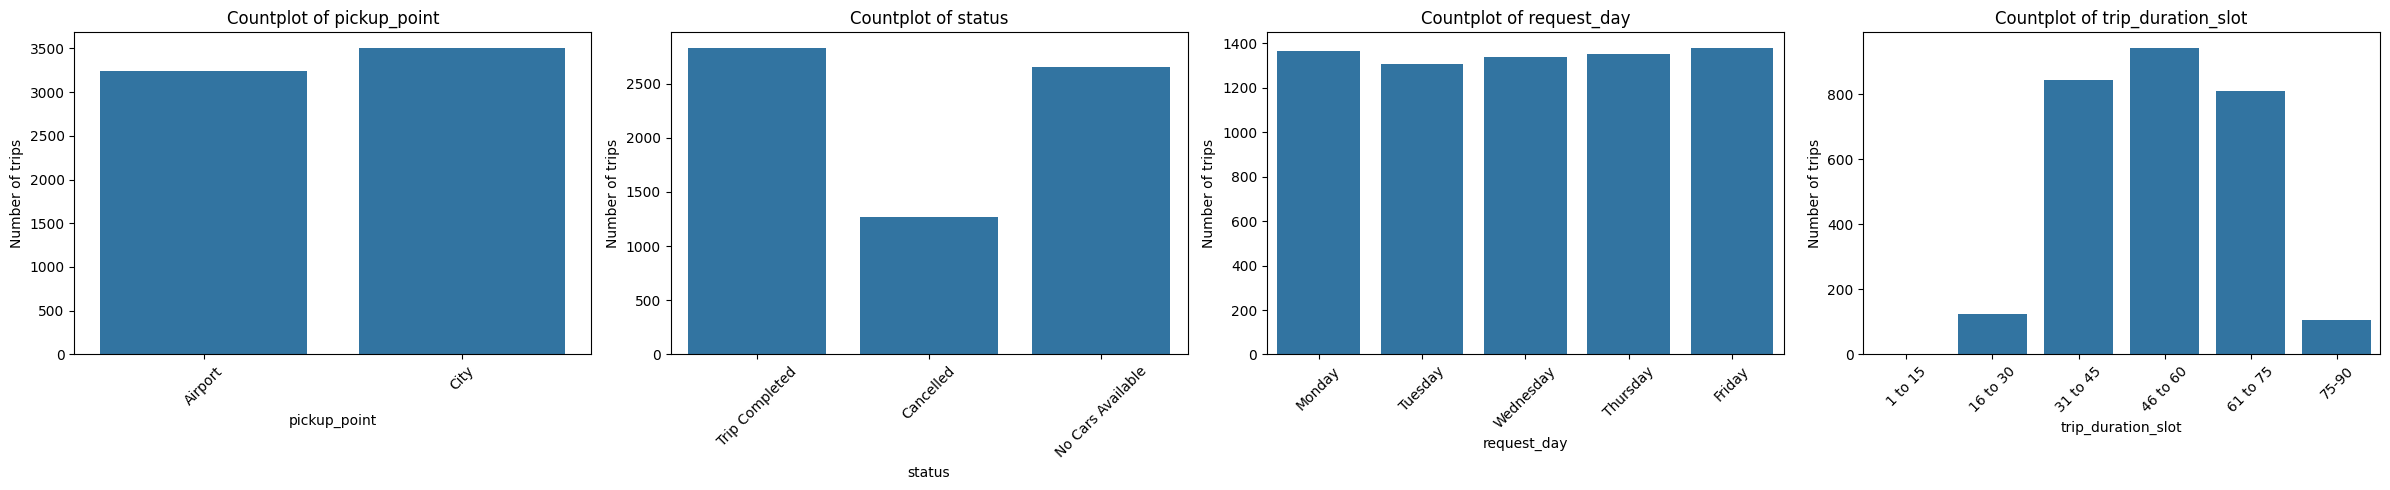

In [86]:
univariate_analysis(["pickup_point", 'status', 'request_day', 'trip_duration_slot'] )

In [87]:
def univariate_analysis_count(cols):
    # If a single list is passed, unpack it
    if isinstance(cols, list):
        cols = cols
    else:
        cols = [cols]

    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, cols):
        sns.kdeplot(data=df, x=col, ax=ax)
        ax.set_title(f"kdeplot of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("frequency")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


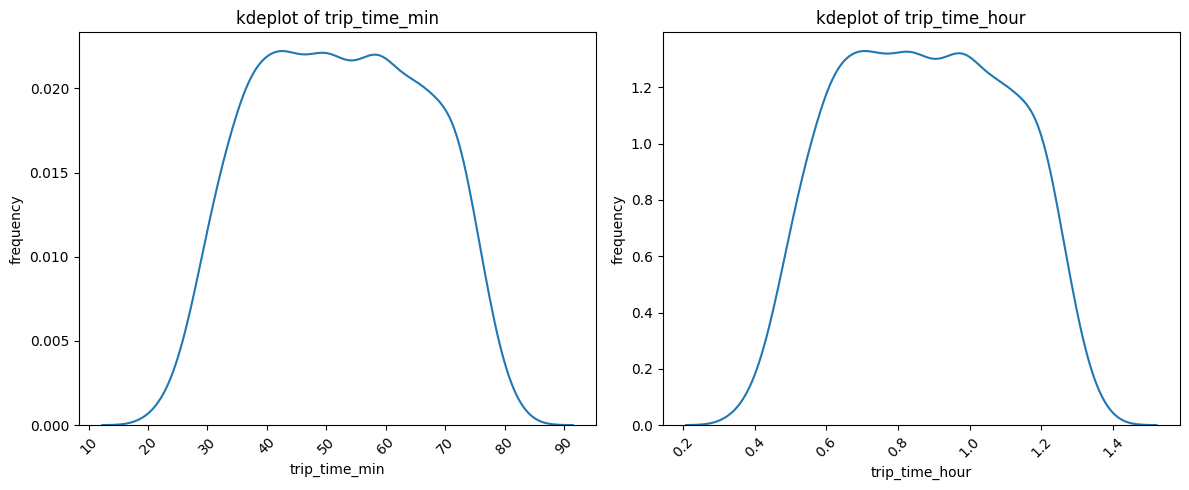

In [88]:
univariate_analysis_count(["trip_time_min", "trip_time_hour"])

###Bi-variate analysis

In [89]:
df.columns

Index(['pickup_point', 'driver_id', 'status', 'request_date', 'request_year',
       'request_day', 'request_hour', 'drop_date', 'drop_year', 'drop_day',
       'drop_hour', 'request_dayslot', 'drop_dayslot', 'trip_time_min',
       'trip_time_hour', 'trip_duration_slot'],
      dtype='object')

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def bivariate_countplots(df, col_pairs):
    n = len(col_pairs)
    cols = 2  # number of plots per row
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*7, rows*5))
    axes = axes.flatten()  # flatten in case rows>1

    for i, (col1, col2) in enumerate(col_pairs):
        sns.countplot(data=df, x=col1, hue=col2, ax=axes[i])
        axes[i].set_title(f'Countplot of {col1} by {col2}')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [91]:
df.head()

,pickup_point,driver_id,status,request_date,request_year,request_day,request_hour,drop_date,drop_year,drop_day,drop_hour,request_dayslot,drop_dayslot,trip_time_min,trip_time_hour,trip_duration_slot
request_id,,,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11,2016,Monday,11,2016-07-11,2016.0,Monday,13.0,late_morning,afternoon,69.00,1.15,61 to 75
867,Airport,1.0,Trip Completed,2016-07-11,2016,Monday,17,2016-07-11,2016.0,Monday,18.0,evening,evening,50.00,0.83,46 to 60
1807,City,1.0,Trip Completed,2016-07-12,2016,Tuesday,9,2016-07-12,2016.0,Tuesday,9.0,late_morning,late_morning,41.00,0.68,31 to 45
2532,Airport,1.0,Trip Completed,2016-07-12,2016,Tuesday,21,2016-07-12,2016.0,Tuesday,22.0,night,night,55.00,0.92,46 to 60
3112,City,1.0,Trip Completed,2016-07-13,2016,Wednesday,8,2016-07-13,2016.0,Wednesday,9.0,early_morning,late_morning,52.52,0.88,46 to 60


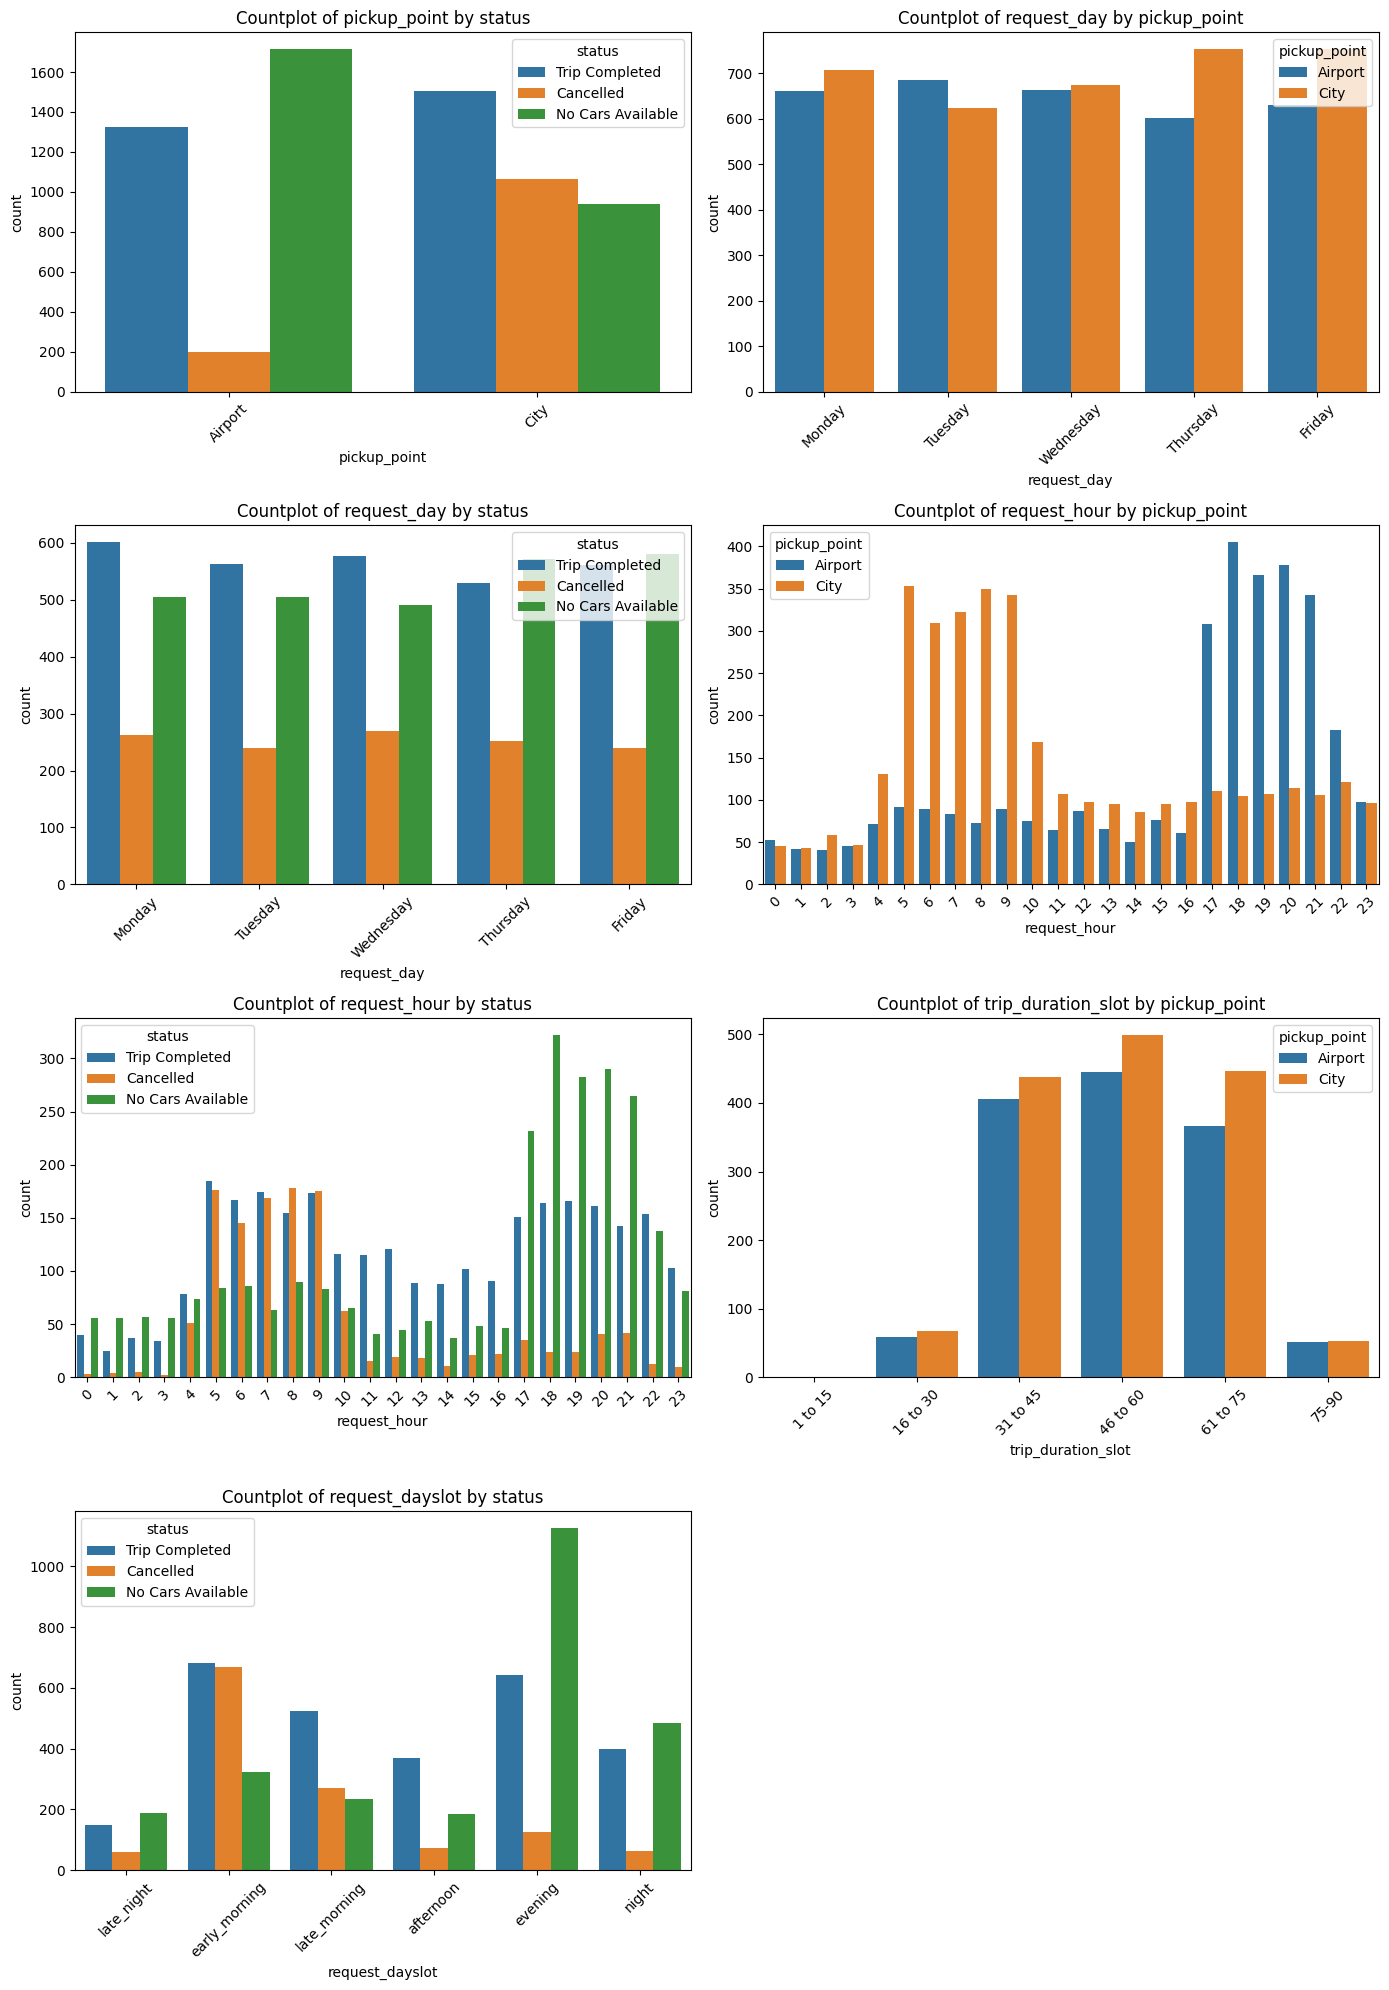

In [92]:
col_pairs =[("pickup_point", "status"), ("request_day", "pickup_point"), ("request_day", "status"), ("request_hour", "pickup_point"), ("request_hour", "status"), ("trip_duration_slot", "pickup_point"),
            ("request_dayslot", "status"),]

bivariate_countplots(df, col_pairs)

### Now lets visualize the data based on pickup points - airport and city

In [95]:
airport= df[df["pickup_point"]== "Airport"]
city= df[df["pickup_point"]== "City"]

### **City**

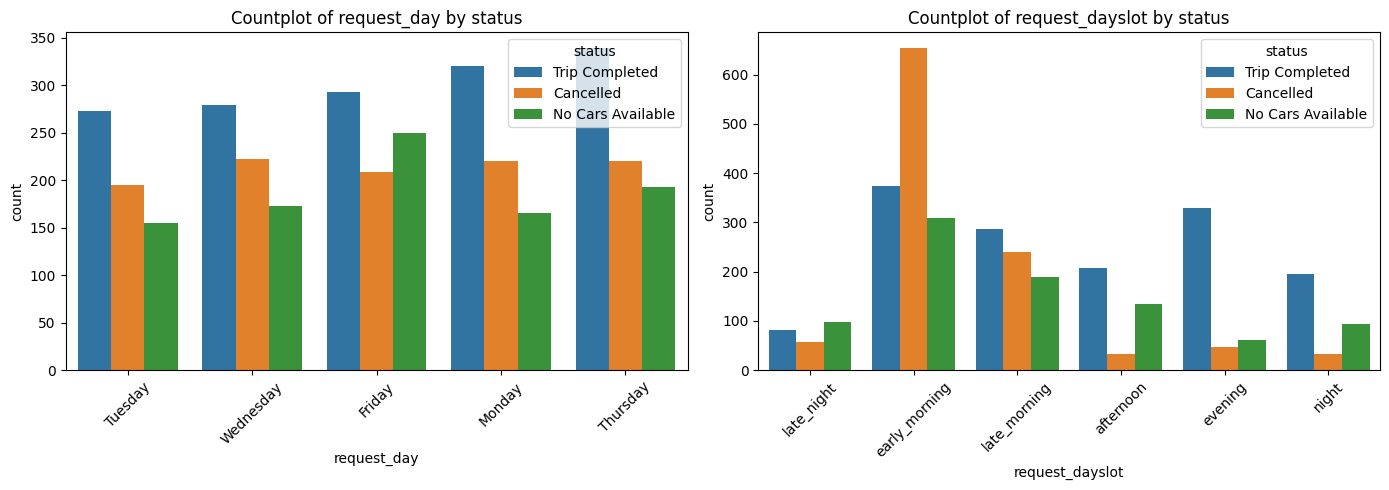

In [98]:
bivariate_countplots(city,[("request_day", "status"), ("request_dayslot", "status")] )

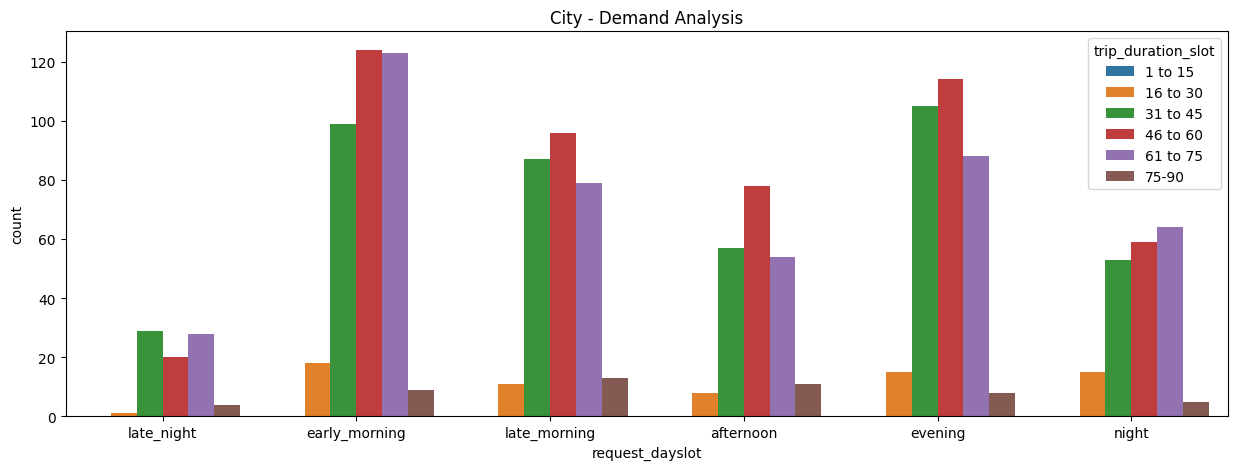

In [107]:
plt.figure(figsize=(15,5))
sns.countplot(data=city, hue="trip_duration_slot", x="request_dayslot")
plt.title("City - Demand Analysis")
plt.show()

### **airport**

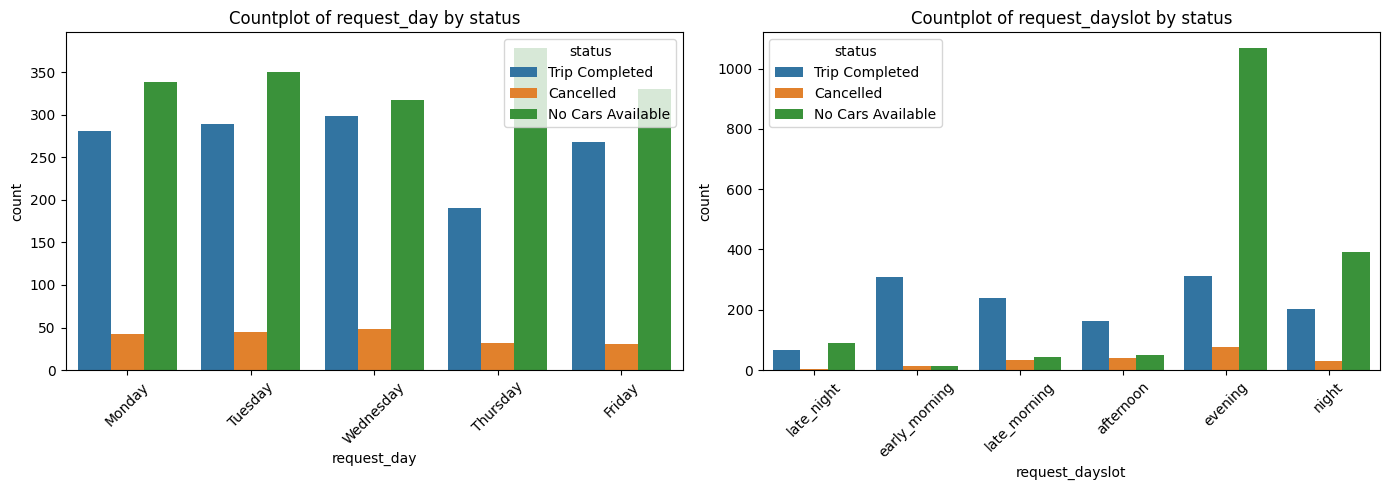

In [99]:
bivariate_countplots(airport,[("request_day", "status"), ("request_dayslot", "status")] )

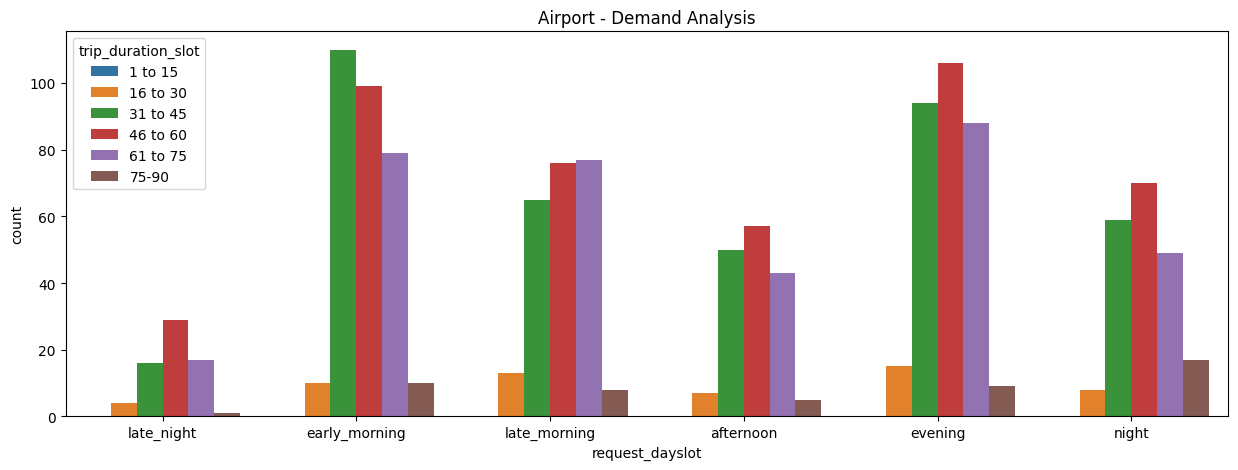

In [108]:
plt.figure(figsize=(15,5))
sns.countplot(data=airport, hue="trip_duration_slot", x="request_dayslot")
plt.title("Airport - Demand Analysis")
plt.show()

In [123]:
# Create frequency tables
city_counts = city['status'].value_counts().rename('city')
airport_counts = airport['status'].value_counts().rename('airport')

# Merge them on status
temp = pd.concat([city_counts, airport_counts], axis=1).fillna(0)

# Calculate totals
temp_city_total = temp['city'].sum()
temp_airport_total = temp['airport'].sum()

# Calculate percentages
temp['city_percent'] = round(temp['city'] / temp_city_total * 100, 2)
temp['airport_percent'] = round(temp['airport'] / temp_airport_total * 100, 2)

temp


,city,airport,city_percent,airport_percent
status,,,,
Trip Completed,1504,1327,42.89,40.98
Cancelled,1066,198,30.40,6.11
No Cars Available,937,1713,26.72,52.90


### **Supply Demand Analysis at the city**

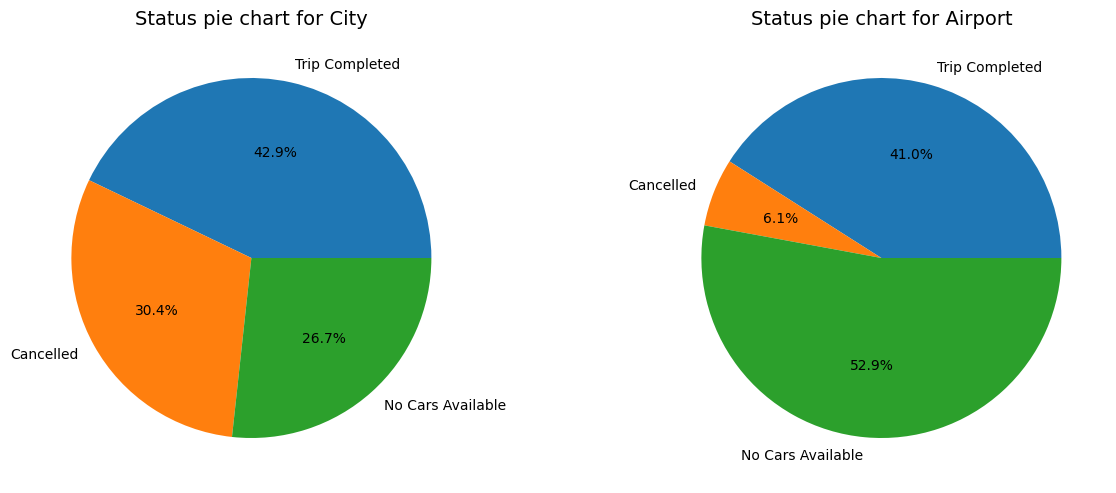

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(temp['city'], labels=temp.index, autopct='%1.1f%%')
ax1.set_title("Status pie chart for City", fontsize=14)

ax2.pie(temp['airport'], labels=temp.index, autopct='%1.1f%%')
ax2.set_title("Status pie chart for Airport", fontsize=14)

plt.subplots_adjust(left=0.05, right=0.95, wspace=0.4)
plt.show()

In [136]:
# Demand: all trip requests
demand = city['request_dayslot'].value_counts().rename("Demand").to_frame()

# Supply: only trips completed
supply = city[city['status'] == 'Trip Completed']['request_dayslot'].value_counts().rename("Supply").to_frame()

# Merge demand and supply on request_dayslot
city_demand_supply = demand.merge(supply, left_index=True, right_index=True, how='left').fillna(0)

# Calculate the gap
city_demand_supply['Gap'] = city_demand_supply['Demand'] - city_demand_supply['Supply']

city_demand_supply


,Demand,Supply,Gap
request_dayslot,,,
early_morning,1335,373,962
late_morning,714,286,428
evening,436,330,106
afternoon,374,208,166
night,323,196,127
late_night,236,82,154


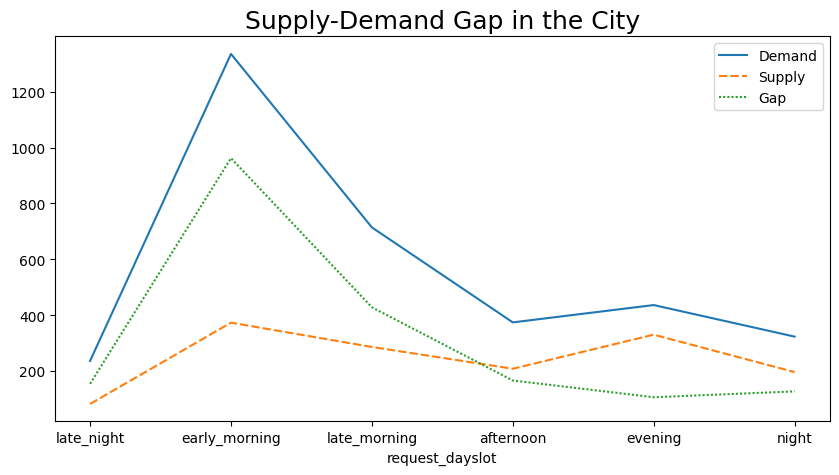

In [137]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the City", fontsize = 18)
plt.show()

In [134]:
# Demand: all trip requests
demand = city['request_hour'].value_counts().rename("Demand").to_frame()

# Supply: only trips completed
supply = city[city['status'] == 'Trip Completed']['request_hour'].value_counts().rename("Supply").to_frame()

# Merge demand and supply on rrequest_hour
city_demand_supply_hour = demand.merge(supply, left_index=True, right_index=True, how='left').fillna(0)

# Calculate the gap
city_demand_supply_hour['Gap'] = city_demand_supply['Demand'] - city_demand_supply['Supply']

city_demand_supply_hour.sort_index()


,Demand,Supply,Gap
request_hour,,,
0,46,17,29
1,43,12,31
2,58,21,37
3,47,19,28
4,131,42,89
5,353,100,253
6,309,86,223
7,323,99,224
8,350,88,262


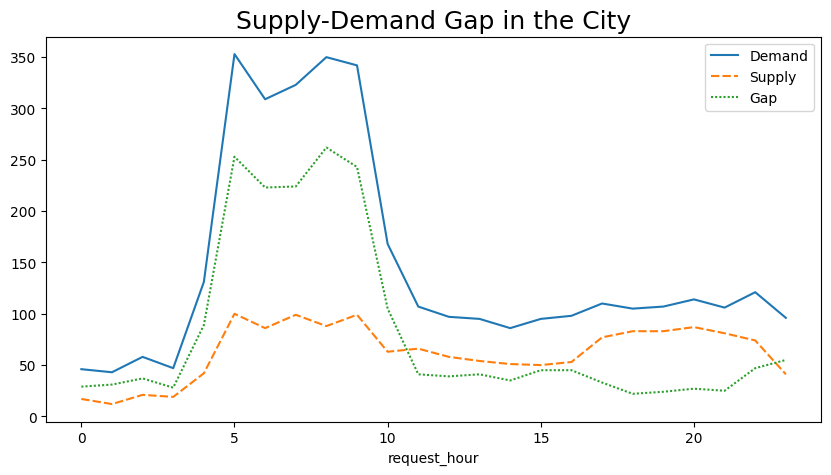

In [135]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply_hour)
plt.title("Supply-Demand Gap in the City", fontsize = 18)
plt.show()

### S**upply Demand Analysis at the Airport**


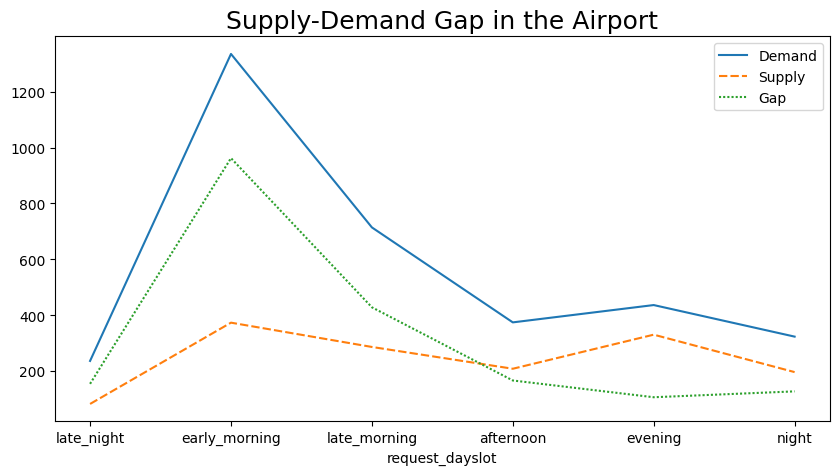

In [138]:
# Demand: all trip requests
demand = airport['request_dayslot'].value_counts().rename("Demand").to_frame()

# Supply: only trips completed
supply = airport[airport['status'] == 'Trip Completed']['request_dayslot'].value_counts().rename("Supply").to_frame()

# Merge demand and supply on request_dayslot
airport_demand_supply = demand.merge(supply, left_index=True, right_index=True, how='left').fillna(0)

# Calculate the gap
airport_demand_supply['Gap'] = airport_demand_supply['Demand'] - airport_demand_supply['Supply']

airport_demand_supply


plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the Airport", fontsize = 18)
plt.show()


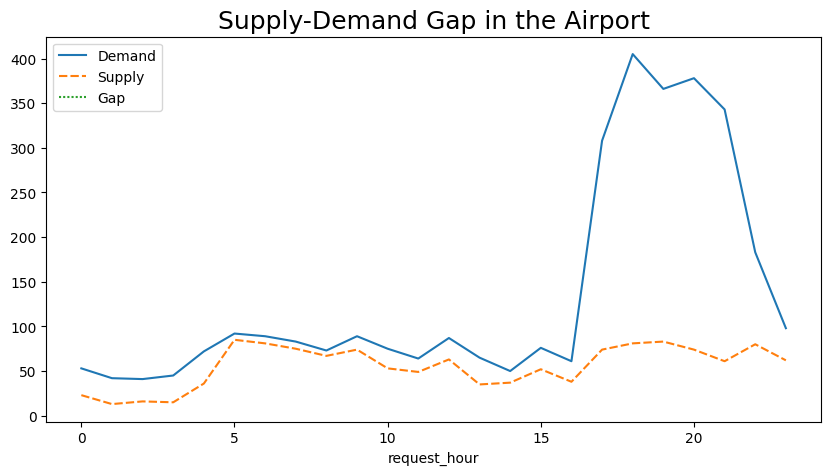

In [140]:
# Demand: all trip requests
demand = airport['request_hour'].value_counts().rename("Demand").to_frame()

# Supply: only trips completed
supply = airport[airport['status'] == 'Trip Completed']['request_hour'].value_counts().rename("Supply").to_frame()

# Merge demand and supply on rrequest_hour
airport_demand_supply_hour = demand.merge(supply, left_index=True, right_index=True, how='left').fillna(0)

# Calculate the gap
airport_demand_supply_hour['Gap'] = airport_demand_supply['Demand'] - airport_demand_supply['Supply']

airport_demand_supply_hour.sort_index()


plt.figure(figsize=(10,5))
sns.lineplot(data=airport_demand_supply_hour)
plt.title("Supply-Demand Gap in the Airport", fontsize = 18)
plt.show()


# **Recommendation and Insights**

### **Insights**

Morning Peak Gap (6–9 AM) – Highest shortfall observed, driven by office commuters and airport-bound passengers.

Evening Peak Gap (5–8 PM) – Demand outstrips supply, likely due to end-of-day office rush and social travel.

Weekend Variation – Weekends show a different demand pattern, with late morning and evening peaks dominating instead of early mornings.

Midday Stability (10 AM–3 PM) – Demand and supply are more balanced; minimal intervention needed here.

Late Night Over-Supply (after 10 PM) – Driver numbers often exceed demand, leading to idle waiting time.

Unserved Ride Requests – A high gap directly translates to lost revenue and lower customer satisfaction.

Slot-to-Slot Volatility – Some adjacent slots show sharp changes in the gap, indicating inconsistent driver availability.

Status-Specific Patterns – “No Cars Available” status spikes align with peak gaps, confirming operational strain.

### **Recommendations**

Peak-Hour Incentives: Offer surge pricing or driver bonuses during 6–9 AM and 5–8 PM to pull in more supply.

Flexible Shift Rosters: Allow part-time drivers to log in for just peak hours.


Dynamic Zone Allocation: Use real-time data to guide drivers to areas with higher gaps rather than keeping them evenly distributed.

Demand Prediction Models: Implement ML models to forecast demand per slot and proactively alert drivers.

Driver Onboarding Campaigns: Recruit additional drivers for peak slots, especially in high-demand neighborhoods.

Customer Communication: Inform riders of likely surge/gap times and offer alternative booking windows to spread demand.

Idle Supply Optimization: Reduce late-night driver numbers or shift them toward premium service offerings where margins are higher.

Gamified Incentives: Reward drivers with badges/bonuses for maintaining high trip acceptance rates during high-gap slots.

Operational Monitoring: Set up a dashboard tracking real-time demand vs supply so dispatch can react quickly.